OVERVIEW
"Beyond the Screen" is a comprehensive analysis project that delves deep into the  dynamics of the movie industry. By investigating various key aspects, this project aims to provide valuable insights to production companies and stakeholders. The exploration focuses on understanding the factors that significantly influence a movie's financial success, encompassing production budgets, release strategies, and timing considerations. 


 Business Problem
1. Impact of Production Budget on Financial Performance: 
Investigate the influence of production budget on a film's financial success. Analyze whether a higher budget directly translates to increased profitability in the film industry.
2. Impact of Production Budget on Gross Revenue:
Explore how the production budget of a movie affects its domestic gross and worldwide gross. Analyze the correlation between production budget and both domestic gross and worldwide gross to understand if higher production budgets lead to higher profits.
3. Impact of Release Month on Profitability:
Investigate whether the month in which a movie is released has a significant impact on its profitability. Determine if certain months are more favorable for releasing movies in terms of maximizing profits.
4. Impact of Release Day of the Week on Profitability:
Explore whether the day of the week on which a movie is released influences its profitability. Analyze if certain days of the week are more profitable for movie releases compared to others.


Data Understanding
The tn.movie_budgets  data contains number of movies, production_budget, domestic gross and worldwide gross. The data also provides movies and their different date of release.


In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
#using pandas library to read my csv file.
df = pd.read_csv('tn.movie_budgets.csv')

Data Exploration: This aims at understanding my data.

In [3]:
# understand the structure and characteristics of my dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# check the number of rows and columns of my dataset.
df.shape

(5782, 6)

In [5]:
# printing few columns to get an overview of my data
df.sample(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1388,89,"Jul 1, 1992",A League of Their Own,"$40,000,000","$107,533,925","$132,440,066"
2521,22,"Apr 15, 2016",Barbershop: The Next Cut,"$20,000,000","$54,030,051","$54,404,202"
4202,3,"Oct 5, 2012",Trade of Innocents,"$5,800,000","$15,091","$15,091"
795,96,"May 16, 2012",The Dictator,"$65,000,000","$59,650,222","$180,148,897"
4682,83,"May 26, 1970",Beneath the Planet of the Apes,"$3,000,000","$17,489,009","$17,489,009"
185,86,"Nov 21, 2008",Bolt,"$150,000,000","$114,053,579","$328,015,029"
3933,34,"Oct 14, 2011",Fireflies in the Garden,"$8,000,000","$36,884","$3,587,191"
2087,88,"Dec 25, 2006",Notes on a Scandal,"$27,500,000","$17,510,118","$50,578,411"
4584,85,"May 25, 1969",Midnight Cowboy,"$3,600,000","$44,785,053","$44,785,053"
4374,75,"Feb 27, 2004",Decoys,"$5,000,000","$84,733","$96,760"


In [6]:
# investigating my data types
df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [7]:
# To get an overview of summary statistics
df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [8]:
df['production_budget'] = df['production_budget'].str.replace('$', '', regex=True)
df['production_budget'] = df['production_budget'].str.replace(',', '', regex=True)

In [9]:
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '', regex=True)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '', regex=True)


In [10]:
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '', regex=True)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '', regex=True)


In [11]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [12]:
# convert the production_budget and domestic_gross from object to int to aid financial computaions
df[['production_budget', 'domestic_gross' ]] = df[['production_budget', 'domestic_gross']].astype(int)

In [13]:
#converting worldwide_gross from object to float for statistical computations
#converting the 'worldwide_gross' to a float data type instead of an integer because one of the values contains a base 10 notation. 
#Converting it to a float allows you to handle both integer and decimal values, providing more flexibility in your data analysis.

df['worldwide_gross'] = df['worldwide_gross'].astype(float)

In [14]:
# viewing summary statisticsafter conversion
df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [15]:
df.dtypes

id                     int64
release_date          object
movie                 object
production_budget      int32
domestic_gross         int32
worldwide_gross      float64
dtype: object

In [16]:
# checking for any NaN values
null_counts = df.isnull().sum()
print(null_counts)

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [17]:
# check if there are any duplicates in my data
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [id, release_date, movie, production_budget, domestic_gross, worldwide_gross]
Index: []


In [18]:
# Checking for zero values in dataset
columns_with_zeros = df.columns[df.isin([0]).any()].tolist()

# Print the columns with zero values
print(columns_with_zeros)

['domestic_gross', 'worldwide_gross']


In [19]:
# Filter rows where domestic_gross or worldwide_gross is 0
zero_rows = df[(df['domestic_gross'] == 0)]

# Print out the filtered rows
print(zero_rows)

      id  release_date                                           movie  \
194   95  Dec 31, 2020                                        Moonfall   
479   80  Dec 13, 2017                                          Bright   
480   81  Dec 31, 2019                                Army of the Dead   
535   36  Feb 21, 2020                                Call of the Wild   
617   18  Dec 31, 2012  AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©   
...   ..           ...                                             ...   
5761  62  Dec 31, 2014                            Stories of Our Lives   
5764  65  Dec 31, 2007                                     Tin Can Man   
5771  72  May 19, 2015                                Family Motocross   
5777  78  Dec 31, 2018                                          Red 11   
5780  81  Sep 29, 2015                            A Plague So Pleasant   

      production_budget  domestic_gross  worldwide_gross  
194           150000000               0             

In [20]:
# Getting the number of rows in the domestic_gross column where the gross is = 0
len(df[df['domestic_gross'] == 0])

548

In [21]:
# % of rows with $0 so that i can be able to come up with the best approach to cleaning that data
548/5782 * 100

9.47768938083708

In [22]:
# Filter rows where domestic_gross or worldwide_gross is 0
zero_rows = df[(df['worldwide_gross'] == 0)]

# Print out the filtered rows
print(zero_rows)

      id  release_date                 movie  production_budget  \
194   95  Dec 31, 2020              Moonfall          150000000   
479   80  Dec 13, 2017                Bright           90000000   
480   81  Dec 31, 2019      Army of the Dead           90000000   
535   36  Feb 21, 2020      Call of the Wild           82000000   
670   71  Aug 30, 2019             PLAYMOBIL           75000000   
...   ..           ...                   ...                ...   
5761  62  Dec 31, 2014  Stories of Our Lives              15000   
5764  65  Dec 31, 2007           Tin Can Man              12000   
5771  72  May 19, 2015      Family Motocross              10000   
5777  78  Dec 31, 2018                Red 11               7000   
5780  81  Sep 29, 2015  A Plague So Pleasant               1400   

      domestic_gross  worldwide_gross  
194                0              0.0  
479                0              0.0  
480                0              0.0  
535                0              0

In [23]:
# Getting the number of rows in the worldwide_gross column where the gross is = 0
len(df[df['worldwide_gross'] == 0])

367

In [24]:
# % of rows with $0 so that i can be able to come up with the best approach to cleaning that data
367/5782 * 100

6.347284676582497

In [ ]:
Data Cleaning

In [30]:
# Drop rows where both domestic_gross and worldwide_gross are zero
df.drop(df[(df['domestic_gross'] == 0) | (df['worldwide_gross'] == 0)].index, inplace=True)



In [32]:
# to check all rows in both  domestic gross and worldwide gorss colomns with zero are dropped to ensure my data is clean for analysis.

columns_with_zeros = df.columns[df.isin([0]).any()].tolist()

# Print the columns with zero values
print(columns_with_zeros)

[]


In [33]:
df['foreign_gross'] = df['worldwide_gross'] - df['domestic_gross']


i create two more columns for months and day of release of movie, to analyze trends over specific periods. By breaking down the release dates into separate components and to can gain valuable insights about the impact of release timing on the movie industry.

In [36]:

# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], format='%b %d, %Y')

# Extract month and year into separate columns
df['release_month'] = df['release_date'].dt.month

# create a new colomn for which day were movies being released
df['release_day_of_week'] = df['release_date'].dt.day_name()


In [37]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,release_day_of_week
0,1,2009-12-18,Avatar,425000000,760507625,2.776345e+09,2.015838e+09,12,Friday
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,8.046000e+08,5,Friday
2,3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08,1.070000e+08,6,Friday
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,9.440081e+08,5,Friday
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,6.965404e+08,12,Friday


In [38]:
# create new column to analyse the profit obtain for domestic audience
df['profit_domestic'] = df['domestic_gross'] - df['production_budget']

In [39]:
# create new column to analyse the profit obtain for  both domestic and foreign audience
df['profit_worldwide'] = df['worldwide_gross'] - df['production_budget']

In [41]:
# create new column to analyse the profit obtain for foreign audience
df['profit_foreign'] = df['foreign_gross'] - df['production_budget']

In [42]:
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,release_day_of_week,profit_domestic,profit_worldwide,profit_foreign
0,1,2009-12-18,Avatar,425000000,760507625,2.776345e+09,2.015838e+09,12,Friday,335507625,2.351345e+09,1.590838e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,8.046000e+08,5,Friday,-169536125,6.350639e+08,3.940000e+08
2,3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08,1.070000e+08,6,Friday,-307237650,-2.002376e+08,-2.430000e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,9.440081e+08,5,Friday,128405868,1.072414e+09,6.134081e+08
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,6.965404e+08,12,Friday,303181382,9.997217e+08,3.795404e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
5775,76,2006-05-26,Cavite,7000,70071,7.164400e+04,1.573000e+03,5,Friday,63071,6.464400e+04,-5.427000e+03
5776,77,2004-12-31,The Mongol King,7000,900,9.000000e+02,0.000000e+00,12,Friday,-6100,-6.100000e+03,-7.000000e+03
5778,79,1999-04-02,Following,6000,48482,2.404950e+05,1.920130e+05,4,Friday,42482,2.344950e+05,1.860130e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1.338000e+03,0.000000e+00,7,Wednesday,-3662,-3.662000e+03,-5.000000e+03


Analysis/Visualization

In [43]:
# importing neccesary libraries for analysis
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
# to get a summary statistics of all columns including the added columns
df.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,profit_domestic,profit_worldwide,profit_foreign
count,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03,5.234000e+03,5234.000000,5.234000e+03,5.234000e+03,5.234000e+03
mean,50.346580,3.403348e+07,4.625747e+07,1.007615e+08,5.450404e+07,6.931792,1.222399e+07,6.672803e+07,2.047056e+07
std,28.848667,4.296048e+07,7.029651e+07,1.811226e+08,1.177829e+08,3.417915,5.187357e+07,1.518522e+08,9.067987e+07
min,1.000000,1.100000e+03,3.880000e+02,4.010000e+02,0.000000e+00,1.000000,-3.072376e+08,-2.002376e+08,-2.430000e+08
25%,25.000000,6.500000e+06,4.289718e+06,8.142571e+06,9.020500e+03,4.000000,-9.202305e+06,-1.396634e+06,-1.345616e+07
50%,50.000000,2.000000e+07,2.198422e+07,3.543844e+07,9.400315e+06,7.000000,2.382080e+05,1.357260e+07,-2.209617e+06
75%,75.000000,4.500000e+07,5.756598e+07,1.093357e+08,5.326507e+07,10.000000,2.114454e+07,7.088258e+07,1.608911e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,12.000000,6.306622e+08,2.351345e+09,1.590838e+09


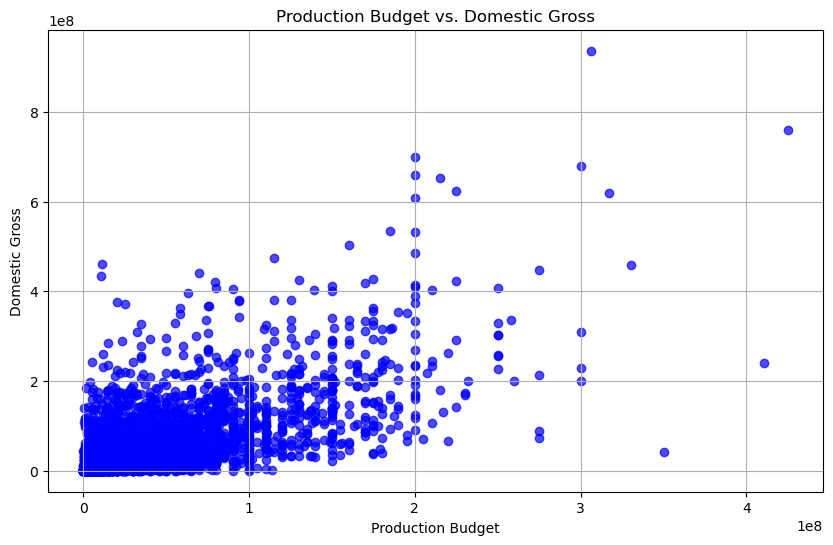

In [45]:
# To show the relationship between production_budget and Domestic_gross
plt.figure(figsize=(10, 6))
plt.scatter(df['production_budget'], df['domestic_gross'], color='blue', alpha=0.7)
plt.title('Production Budget vs. Domestic Gross')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.grid(True)
plt.show()


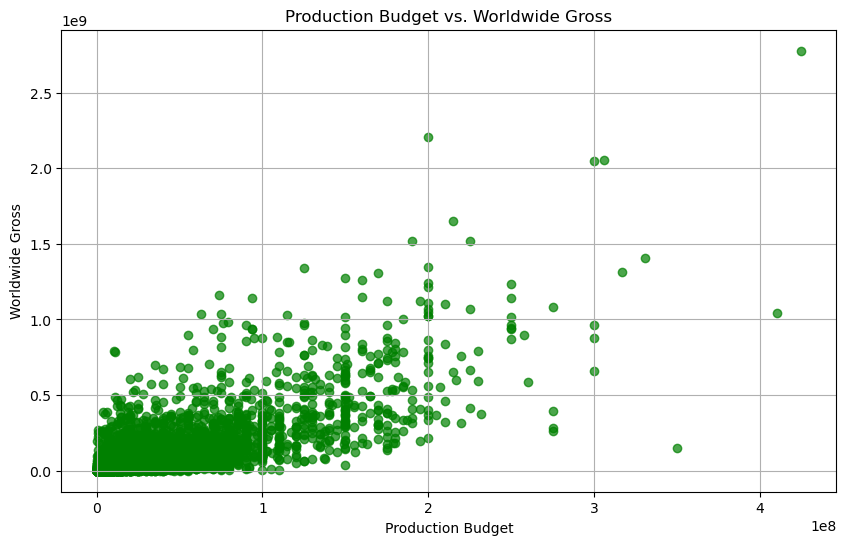

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df['production_budget'], df['worldwide_gross'], color='green', alpha=0.7)
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.show()

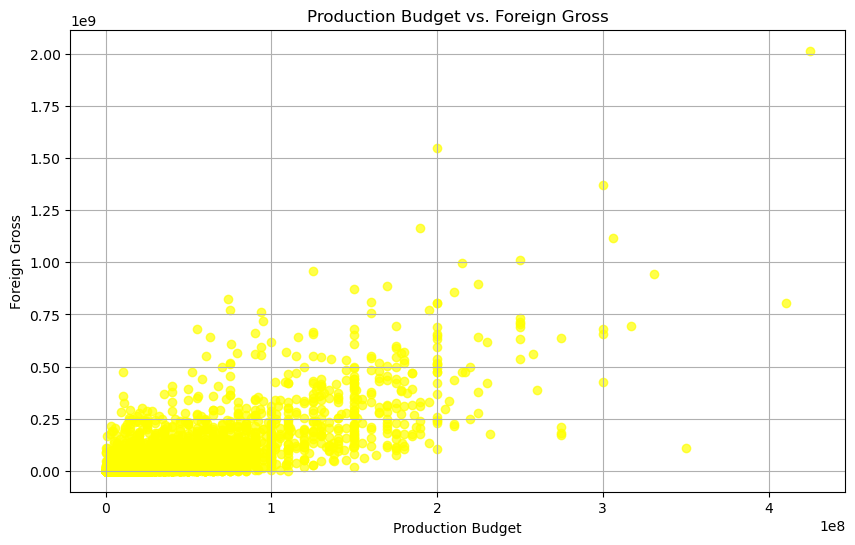

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df['production_budget'], df['foreign_gross'], color='yellow', alpha=0.7)
plt.title('Production Budget vs. Foreign Gross')
plt.xlabel('Production Budget')
plt.ylabel('Foreign Gross')
plt.grid(True)
plt.show()

From the above plots we can observe the points are concentrated in a straight line sloping upwards from left to right, it indicates a strong positive correlation. In this case, as the Production Budget increases, the Domestic Gross, Worldwide_Gross and foreign_gross also tends to increase proportionally. The concentration of points indicates that there is little variability in other words, movies with similar production budgets tend to have similar domestic gross earnings, Worldwide gross and Foreign gross.

 We want to analyse and understand if higher production_budgets result in higher profits, in domestic, foreign and worldwide gross.

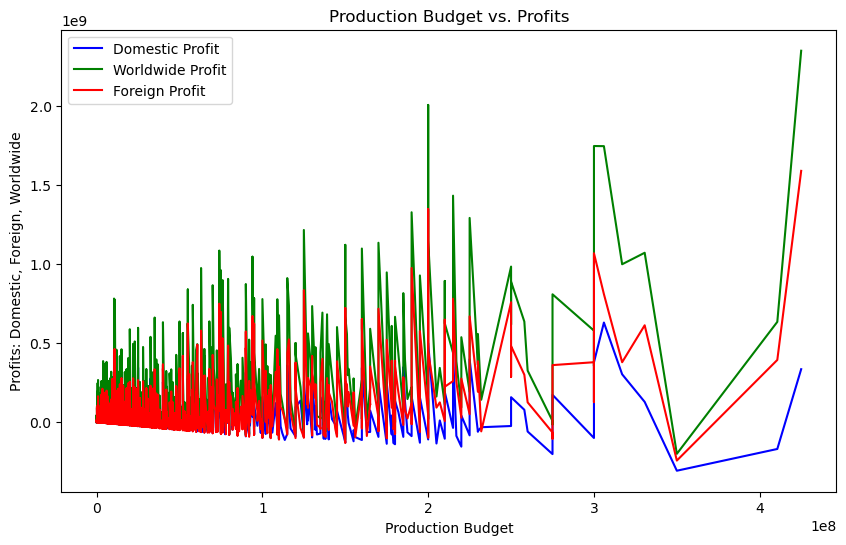

In [48]:
# We plot a multiple line graph.

fig, ax = plt.subplots(figsize=(10, 6))

# Line plot for Domestic Profit
ax.plot(df['production_budget'], df['profit_domestic'], color='blue', label='Domestic Profit')

# Line plot for Worldwide Profit
ax.plot(df['production_budget'], df['profit_worldwide'], color='green', label='Worldwide Profit')

# Line plot for Foreign Profit
ax.plot(df['production_budget'], df['profit_foreign'], color='red', label='Foreign Profit')

# Adding labels for x, y and title
ax.set_title('Production Budget vs. Profits')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Profits: Domestic, Foreign, Worldwide')

# Legend with specified location (upper left in this case)
ax.legend(['Domestic Profit', 'Worldwide Profit', 'Foreign Profit'], loc='upper left')

plt.show()

 Investigate whether the month in which a movie is released has a significant impact on its profitability. Determine if certain months are more favorable for releasing movies in terms of maximizing profits.

In [50]:
monthly_movie_counts = df['release_month'].value_counts()

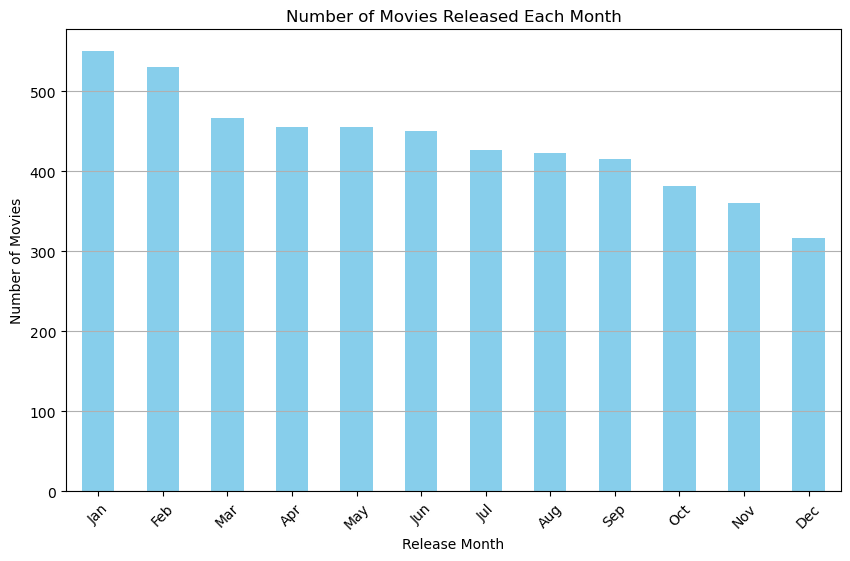

In [51]:
# Create a bar plot to show the number of movies released in each month
plt.figure(figsize=(10, 6))
monthly_movie_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Each Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.show()

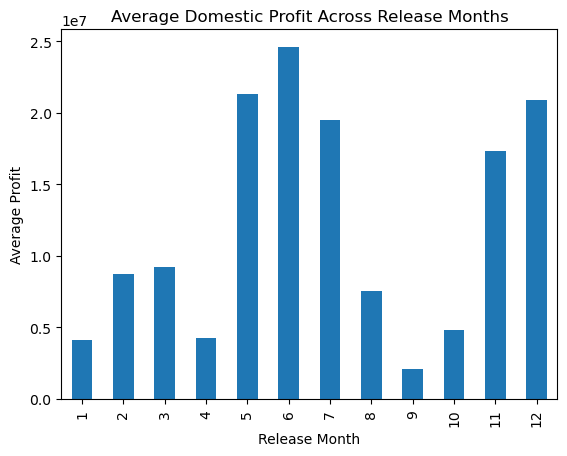

In [52]:
# Analyse which are the best months to release months based on profitability if the main target is local audience.
mean_profits = df.groupby('release_month')['profit_domestic'].mean()
mean_profits.plot(kind='bar')
plt.title('Average Domestic Profit Across Release Months')
plt.xlabel('Release Month')
plt.ylabel('Average Profit')
plt.show()

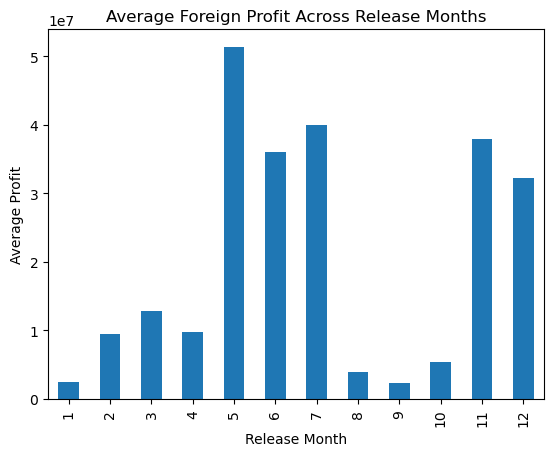

In [54]:
# Analyse which are the best months to release months based on profitabilty if the main target is foreign countries.
mean_profits = df.groupby('release_month')['profit_foreign'].mean()
mean_profits.plot(kind='bar')
plt.title('Average Foreign Profit Across Release Months')
plt.xlabel('Release Month')
plt.ylabel('Average Profit')
plt.show()


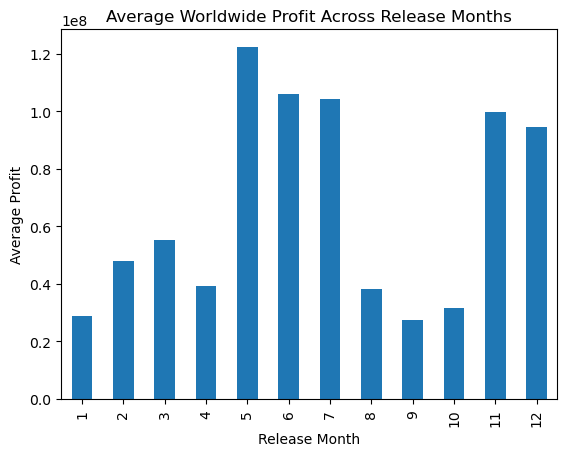

In [55]:
# Analyse which are the best months to release months if the target is worldwide target.
mean_profits = df.groupby('release_month')['profit_worldwide'].mean()
mean_profits.plot(kind='bar')
plt.title('Average Worldwide Profit Across Release Months')
plt.xlabel('Release Month')
plt.ylabel('Average Profit')
plt.show()

In [56]:
# an overview which day of the week movies were really released.
weekly_movie_counts = df['release_day_of_week'].value_counts()
print(weekly_movie_counts)

Friday       4359
Wednesday     573
Thursday      125
Tuesday        88
Sunday         32
Saturday       29
Monday         28
Name: release_day_of_week, dtype: int64


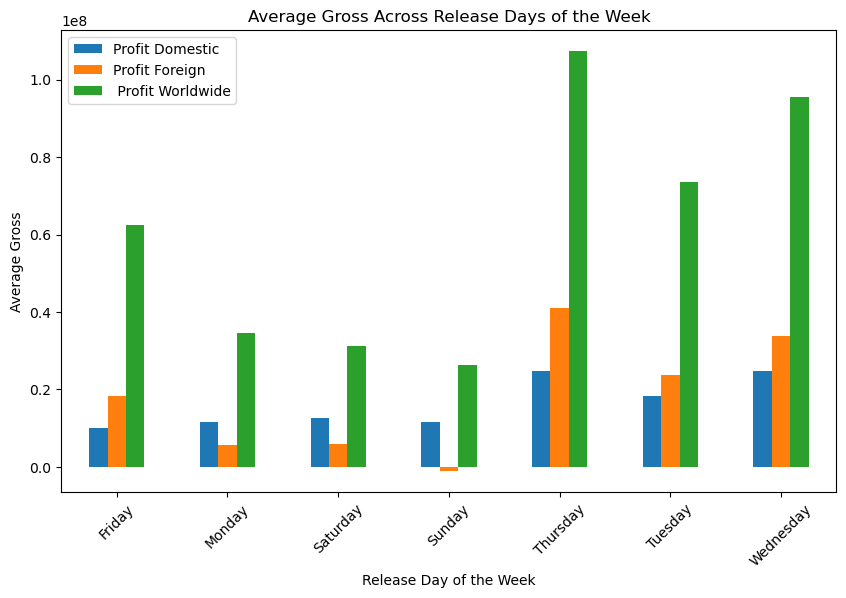

In [58]:
mean_gross_by_day = df.groupby('release_day_of_week')[['profit_domestic', 'profit_foreign', 'profit_worldwide']].mean()

# Plotting the bar graph
mean_gross_by_day.plot(kind='bar', figsize=(10, 6))
plt.title('Average Gross Across Release Days of the Week')
plt.xlabel('Release Day of the Week')
plt.ylabel('Average Gross')
plt.xticks(rotation=45)
plt.legend(['Profit Domestic', 'Profit Foreign', ' Profit Worldwide'])
plt.show()


Impact of Production budget on Domestic_gross, Worldwide_gross and difference_gross.
From the above plots 'Production Budget vs. Domestic Gross', 'Production Budget vs. Foreign Gross' and 'Production Budget vs. Worldwide Gross'we can observe the points are concentrated in a straight line sloping upwards from left to right, it indicates a strong positive correlation. In this case, as the Production Budget increases, the Domestic Gross, Worldwide_Gross and gross_difference also tends to increase proportionally. The concentration of points indicates that there is little variability in other words, movies with similar production budgets tend to have similar domestic gross earnings, Worldwide gross and Foreign gross.


Investigating the Impact of Production Budget on Financial Performance ie Profits.
From the analysis conducted, it is evident that there is no clear indication that a higher production budget directly translates to higher domestic profit, worldwide profit, or foreign profit. Despite the common belief that a substantial budget leads to increased profitability, our findings challenge this assumption.


Optimal Release Months

a). On Local/ Domestic Audience
The analysis underscores  as the most favorable months for movie releases, especially when targeting local or domestic audiences. Films launched during these months tend to perform exceptionally well based on domestic profit, indicating a higher level of audience engagement or increased market demand. The month of  June emerges as the most profitable month for domestic releases, followed by May, December, July, and November, in that order. These months represent the top five periods for movie releases, particularly when aiming to maximize profits within the local market. The worst to months to release movies would be September, January and April.


b). On Foreign Audience
From the findings, May and July as the most favorable months for movie releases when targeting foreign audiences. Films launched during these months tend to achieve exceptional performance in international markets. Following closely are November, June, and December, making them the next preferred months for maximizing profits from foreign audiences. These findings emphasize the importance of strategic planning tailored to different audience regions. From the findings we could conclude September, January, and August being the worst movies to release movies if the target market is foreign audience.


c). Worldwide Audience(both local and foreign audience)
When considering both local and foreign audiences, the analysis highlights May, June, July, November, and December as the best months for movie releases and September, January and October beings the months to avoid. Films launched during these months tend to capture significant audience attention and perform exceptionally well on a global scale.


Strategic release timing based on days of the weeks.

a). When targeting the local market, the optimal days for movie releases are Thursdays and Wednesdays. Saturday and Sundays being the days with worst perfomance. These midweek days tend to attract higher audience engagement and, consequently, better performance at the domestic box office.


b). For foreign audiences, Thursdays and Wednesdays also emerge as the preferred days. This pattern indicates a consistent global trend where midweek releases resonate well with international viewers, leading to favorable outcomes in foreign markets. Mondays and Sundays being the days with worst perfomance.


c). Considering a worldwide audience, Thursdays and Wednesdays maintain their status as the best days to release movies. These days offer a strategic advantage for filmmakers aiming to capture both local and foreign viewership. Mondays and Tuesdays being the days with worst perfomance

Recommendations


Impact of Production budget on Domestic_gross, Worldwide_gross and difference_gross.
Filmmakers and production companies should carefully plan how they allocate their budgets for movie projects. By studying the successes of past projects, they can identify patterns where higher budgets have resulted in increased earnings. The key is to analyze what worked well in previous projects, understand the budget allocation strategies that led to financial success, and use those strategies in future endeavors. 

Investigating the Impact of Production Budget on Financial Performance ie Profits.
A large budget can certainly improve a film's quality, but it doesn't automatically mean the movie will be financially successful. To ensure profitability, it's crucial to allocate resources wisely and market the film effectively. This means making smart choices when it comes to equipment, personnel, and other production elements to prevent unnecessary expenses. Additionally, understanding the target audience and tailoring marketing efforts to appeal to them directly can significantly impact a film's box office performance

Optimal release months.

a) Domestic Market:
Concentrate your major releases on June, May, July, November, and December for local or domestic audiences. These months have consistently shown exceptional performance based on profit. Minimize releases in September, January, and April, as these months tend to have minimal profits within the local market.


b) Foreign Markets:
For international markets, prioritize releases in May and July. These months have proven success in foreign audiences, ensuring exceptional performance and widespread attention. Following closely, June, November, and December also offer strong potential for maximizing profits from foreign viewers. Avoid September, January, and August for foreign audiences. These months have shown comparatively weaker performance globally.


c) Global Market:
When considering both local and foreign audiences, capitalize on May, June, July, November, and December. These months have a universal appeal, capturing significant audience attention and ensuring exceptional performance on a global scale. To maximize worldwide profits, refrain from releasing movies in September, January, and October. These months tend to have lower global audience engagement.


Optimal Release Days

Focus on Wednesdays and Thursdays: Regardless of the target audience—local, foreign, or worldwide—opt for movie releases on Wednesdays and Thursdays. These midweek days consistently attract higher profits at both domestic and international box offices. By choosing these days, filmmakers can maximize their movie's and profitability across diverse audience segments.